<a href="https://colab.research.google.com/github/komfysach/breast-cancer-detector/blob/master/breast_cancer_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer ['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
print(cancer ['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
print(cancer ['target_names'])

['malignant' 'benign']


In [9]:
print(cancer ['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
cancer['data'].shape

(569, 30)

#Massaging data into Data Frame using pandas and numpy

In [11]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [12]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [13]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


#Visualise the data

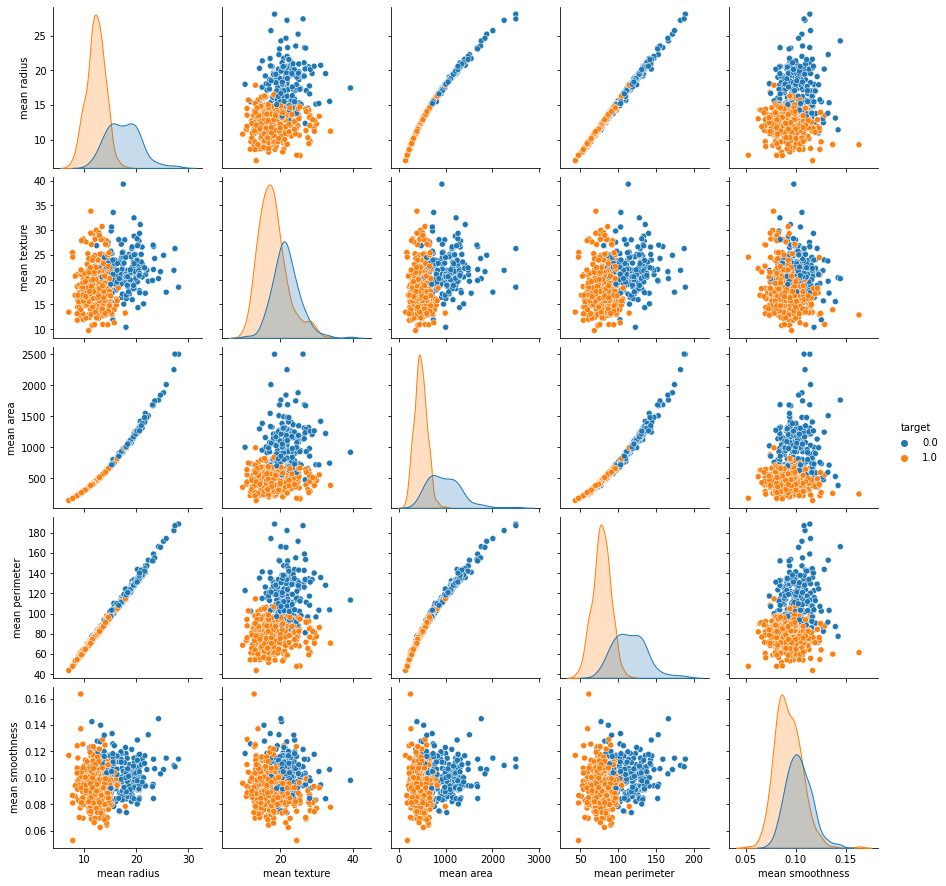

In [14]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


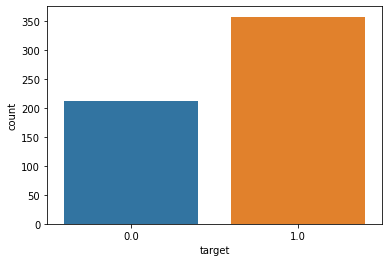

In [15]:
sns.countplot(df_cancer['target'])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

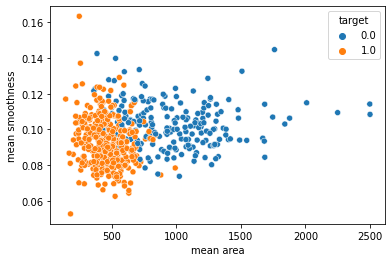

In [ ]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)

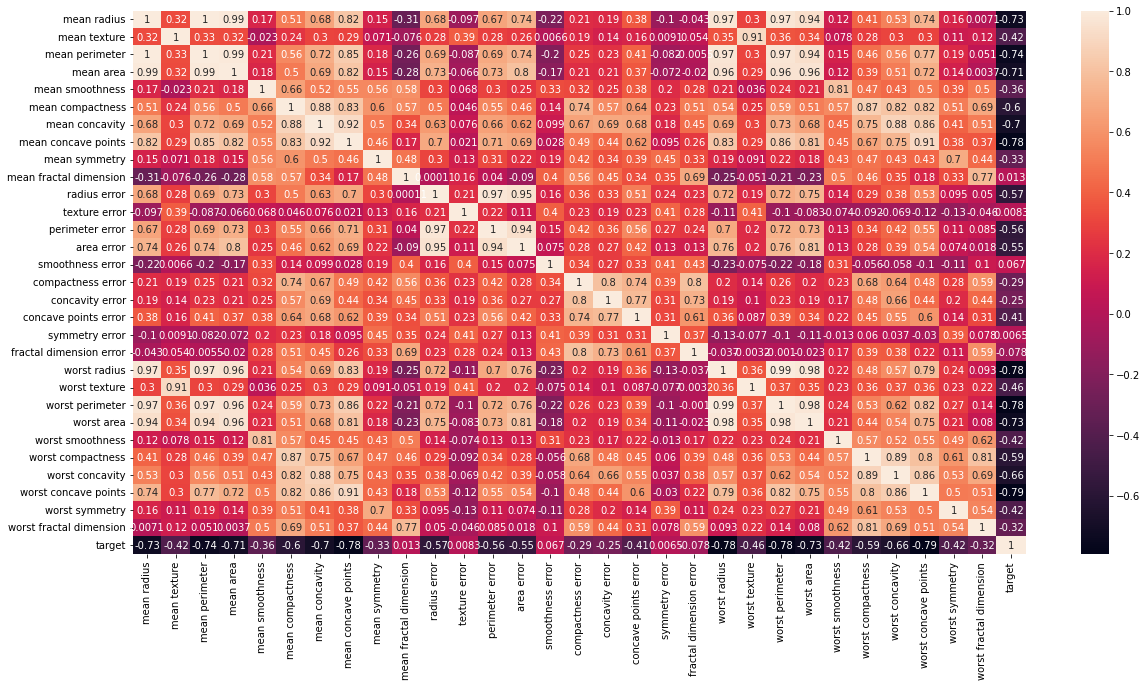

In [16]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_cancer.corr(), annot = True)

#Train our model (Finding a problem solution)

In [17]:
X = df_cancer.drop(['target'], axis = 1)

In [18]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
y = df_cancer['target']

In [20]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

#Split data into training and testing data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [23]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,0.1903,0.5735,1.204,15.500,0.003632,0.007861,0.001128,0.002386,0.01344,0.002585,14.41,20.45,92.00,636.9,0.11280,0.1346,0.01120,0.02500,0.2651,0.08385
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,0.1916,1.5550,1.359,13.660,0.005391,0.009947,0.011630,0.005872,0.01341,0.001659,13.05,36.32,85.07,521.3,0.14530,0.1622,0.18110,0.08698,0.2973,0.07745
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,0.6362,1.3050,4.312,76.360,0.005530,0.052960,0.061100,0.014440,0.02140,0.005036,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,0.1115,1.2310,2.363,7.228,0.008499,0.076430,0.153500,0.029190,0.01617,0.012200,10.85,22.82,76.51,351.9,0.11430,0.3619,0.60300,0.14650,0.2597,0.12000
244,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,0.5243,1.8020,4.037,60.410,0.010610,0.032520,0.039150,0.015590,0.02186,0.003949,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.34580,0.15640,0.2920,0.07614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.406,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
73,13.800,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,0.2787,0.6205,1.957,23.350,0.004717,0.020650,0.017590,0.009206,0.01220,0.003130,16.57,20.86,110.30,812.4,0.14110,0.3542,0.27790,0.13830,0.2589,0.10300
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.119800,0.2113,0.07115,0.4030,0.7747,3.123,41.510,0.007159,0.037180,0.061650,0.010510,0.01591,0.005099,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.90340,0.19640,0.3245,0.11980
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,0.5520,1.0720,3.598,58.630,0.008699,0.039760,0.059500,0.013900,0.01495,0.005984,20.19,30.50,130.30,1272.0,0.18550,0.4925,0.73560,0.20340,0.3274,0.12520


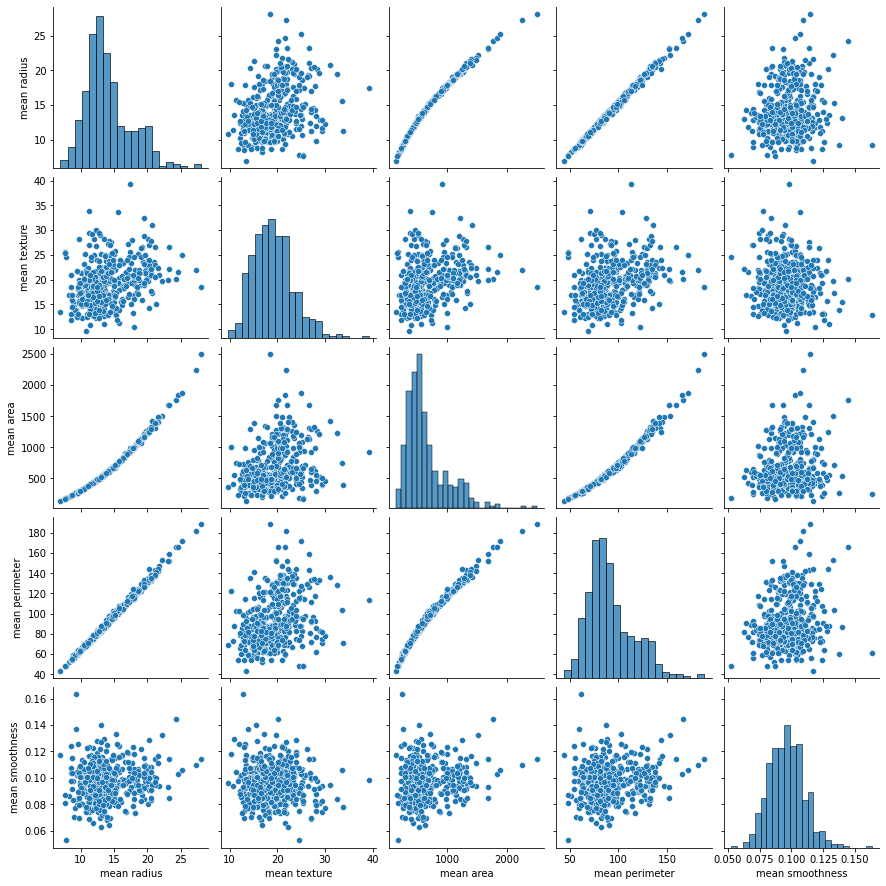

In [36]:
sns.pairplot(X_train, vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

In [24]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,0.4390,1.0120,3.498,43.50,0.005233,0.030570,0.03576,0.010830,0.01768,0.002967,20.27,36.71,149.30,1269.0,0.1641,0.61100,0.63350,0.20240,0.4027,0.09876
163,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,0.2949,1.6560,1.955,21.55,0.011340,0.031750,0.03125,0.011350,0.01879,0.005348,13.58,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,0.2929,0.8570,1.928,24.19,0.003818,0.012760,0.02882,0.012000,0.01910,0.002808,15.70,15.98,102.80,745.5,0.1313,0.17880,0.25600,0.12210,0.2889,0.08006
361,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,0.2621,1.5390,2.028,20.98,0.005498,0.020450,0.01795,0.006399,0.01829,0.001956,14.20,29.20,92.94,621.2,0.1140,0.16670,0.12120,0.05614,0.2637,0.06658
549,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,0.5196,1.9180,3.564,33.00,0.008263,0.018700,0.01277,0.005917,0.02466,0.002977,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,0.4681,1.6270,3.043,45.38,0.006831,0.014270,0.02489,0.009087,0.03151,0.001750,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
515,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,0.2430,1.0100,1.491,18.19,0.008577,0.016410,0.02099,0.011070,0.02434,0.001217,12.47,23.03,79.15,478.6,0.1483,0.15740,0.16240,0.08542,0.3060,0.06783
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.92,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300


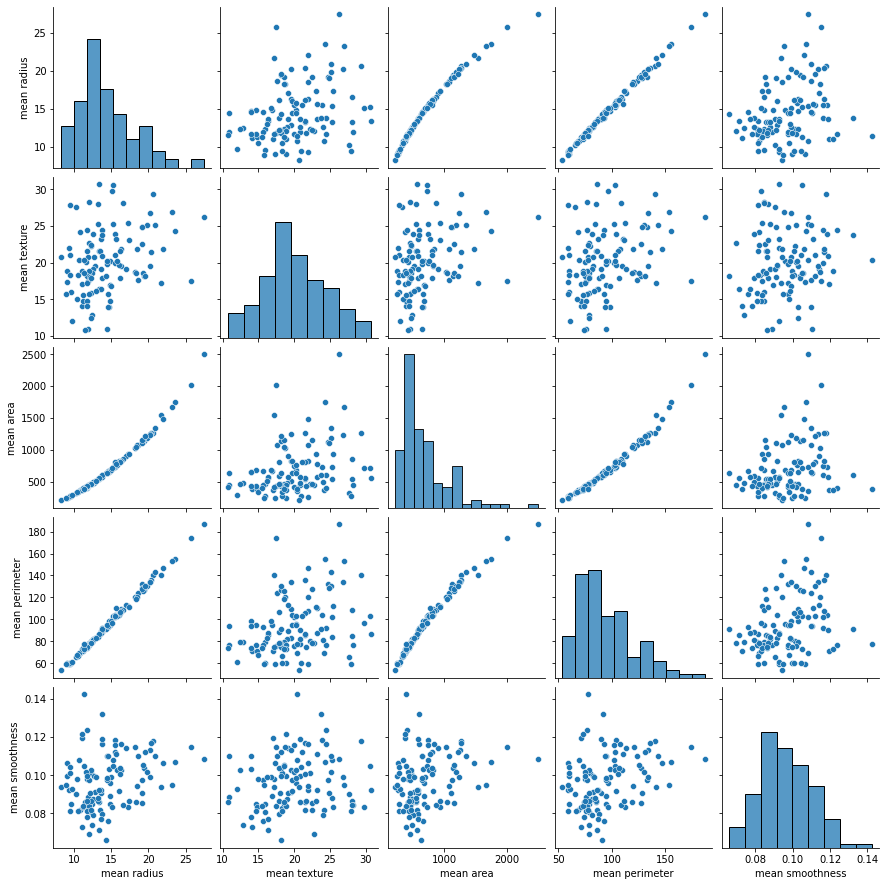

In [38]:
sns.pairplot(X_test, palette="", vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

In [39]:
y_train

306    1.0
410    1.0
197    0.0
376    1.0
244    0.0
      ... 
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 455, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


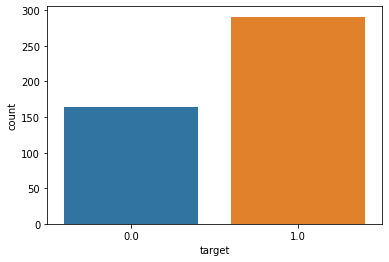

In [41]:
sns.countplot(y_train)

In [42]:
y_test

28     0.0
163    1.0
123    1.0
361    1.0
549    1.0
      ... 
414    0.0
515    1.0
186    0.0
3      0.0
261    0.0
Name: target, Length: 114, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


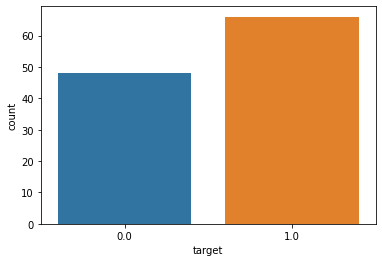

In [43]:
sns.countplot(y_test)

In [25]:
from sklearn.svm import SVC

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
svc_model = SVC()

In [28]:
svc_model.fit(X_train, y_train)

SVC()

#Model evaluation

In [29]:
y_predict = svc_model.predict(X_test)

In [30]:
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [31]:
cm = confusion_matrix(y_test, y_predict)

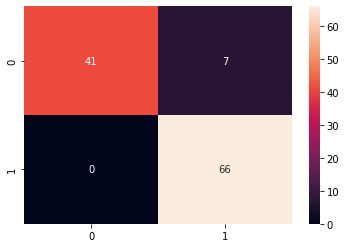

In [32]:
sns.heatmap(cm, annot = True)

#Improving the model

In [45]:
min_train = X_train.min()

In [46]:
range_train = (X_train - min_train).max()

#Scaling the data for normalisation

In [47]:
X_train_scaled = (X_train - min_train)/range_train

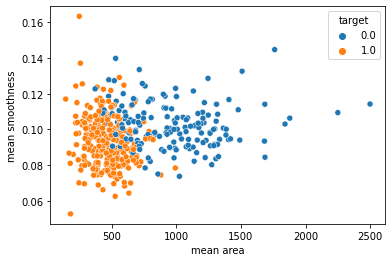

In [48]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)

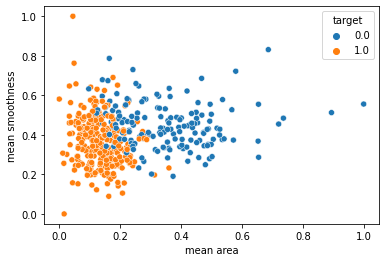

In [49]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'], hue = y_train)

In [50]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [51]:
svc_model.fit(X_train_scaled, y_train)

SVC()

In [52]:
y_predict = svc_model.predict(X_test_scaled)

In [53]:
cm = confusion_matrix(y_test, y_predict)

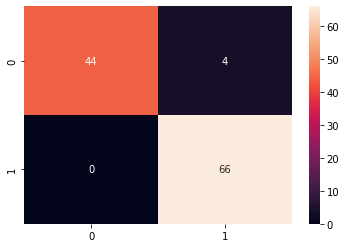

In [54]:
sns.heatmap(cm, annot = True)

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#Improving the model - Part 2

In [56]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)

In [59]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [60]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [61]:
grid_predictions = grid.predict(X_test_scaled)

In [62]:
cm = confusion_matrix(y_test, grid_predictions)

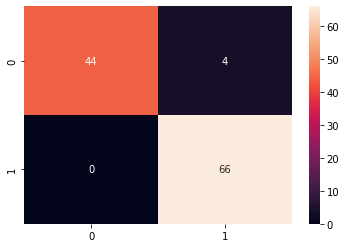

In [63]:
sns.heatmap(cm, annot = True)

In [64]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [65]:
clf_report = classification_report(y_test, grid_predictions, output_dict=True)

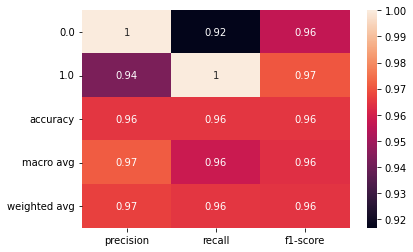

In [66]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)